In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [2]:
!ls /datastore/cam5/

nat_hist


In [3]:
ds_hadgem = xr.open_dataset('/datastore/hadgem3/nat_hist/tas_Aday_HadGEM3-A-N216_Nat-Hist_CMIP5-est1_v1-0_r1i1p6_19600101-19691230.nc')

In [4]:
ds_hadgem

<xarray.Dataset>
Dimensions:    (bnds: 2, height: 1, lat: 324, lon: 432, time: 3600)
Coordinates:
  * height     (height) float32 2.0
  * lat        (lat) float32 -89.72222 -89.166664 ... 89.16667 89.72223
  * lon        (lon) float32 0.41666666 1.25 2.0833333 ... 358.75 359.5833
  * time       (time) object 1960-01-01 12:00:00 ... 1969-12-30 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float32 ...
    lon_bnds   (lon, bnds) float32 ...
    time_bnds  (time, bnds) object ...
    tas        (time, height, lat, lon) float32 ...
Attributes:
    history:                   2016-03-25T03:17:06Z: Naming and attribute con...
    source:                    MOHC Unified Model [N216L85]
    institution:               Met Office Hadley Centre, Fitzroy Road, Exeter...
    institute_id:              MOHC
    model_id:                  HadGEM3-A-N216
    forcing:                   GHG, Oz, LU, Sl, Vl, AA, (GHG = CO2, N2O, CH4,...
    parent_experiment_id:      N/A
    parent_experiment_rip:     N/A
    branch_time:               0.0
    contact:                   peter.stott@metoffice.gov.uk, andrew.ciavarell...
    initialization_method:     1
    physics_version:           6
    tracking_id:               5f9232e5-ab59-4820-909f-e2189888e285
    mo_runid:                  aorsf
    product:                   output
    experiment:                CMIP5-est1
    frequency:                 day
    creation_date:             2016-03-25T03:17:06Z
    project_id:                EUCLEIA, and C20C+ Detection and Attribution P...
    table_id:                  Table day (13 January 2015) 159846346d11cd9e5d...
    title:                     HadGEM3-A-N216 model output prepared for EUCLE...
    parent_experiment:         N/A
    modeling_realm:            atmos
    realization:               1
    cmor_version:              2.9.1
    experiment_family:         Nat-Hist
    parent_experiment_family:  N/A
    orig_experiment_id:        historicalNat
    subexperiment:             v1-0
    parent_subexperiment:      N/A
    orig_project_id:           EUCLEIA
    CDO:                       Climate Data Operators version 1.7.0 (http://m...
    run_id:                    r1i1p6
    acknowledgement:           This simulation was performed under funding fr...
    parent_run_id:             N/A
    license:                   I agree to restrict my use of EUCLEIA model ou...

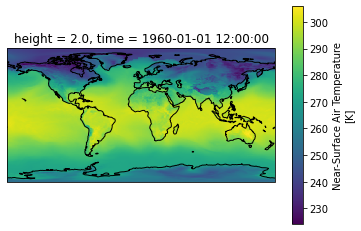

In [5]:
proj = ccrs.PlateCarree()
ax = plt.subplot(projection=proj)
ds_hadgem.isel(time=0).tas.plot(transform=proj, ax=ax)
ax.coastlines()

All good

In [6]:
ds_cam = xr.open_dataset('/datastore/cam5/nat_hist/tas_Aday_CAM5-1-1degree_Nat-Hist_CMIP5-est1_v2-0_run001_19600101-19601231.nc')

In [7]:
ds_cam

<xarray.Dataset>
Dimensions:    (height: 1, lat: 192, lon: 288, nb2: 2, time: 365)
Coordinates:
  * height     (height) float32 2.0
  * lat        (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * lon        (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * time       (time) object 1960-01-01 12:00:00 ... 1960-12-31 12:00:00
Dimensions without coordinates: nb2
Data variables:
    time_bnds  (time, nb2) object ...
    tas        (time, height, lat, lon) float32 ...
Attributes:
    history:                   2015-04-16T17:52:14Z: Naming and attribute con...
    title:                     CAM5.1 model at 1.25x0.9375degree resolution
    forcing:                   SST=tos-sic_HadISST1-NOAA-OI-v2-for-LBNL-CAM5-...
    institute_run_id:          CAM5-1-1degree_Nat-Hist_CMIP5-est1_v1-3-0_run001
    CDO:                       Climate Data Operators version 1.6.7 (https://...
    institution:               Lawrence Berkeley National Laboratory, Berkele...
    institute_id:              LBNL
    experiment_family:         Nat-Hist
    experiment:                CMIP5-est1
    subexperiment:             v2-0
    run_id:                    run001
    model_id:                  CAM5.1-1degree
    frequency:                 day
    parent_experiment_family:  N/A
    parent_experiment:         N/A
    parent_subexperiment:      N/A
    parent_run_id:             N/A
    project_id:                C20C+ Detection and Attribution Project
    license:                   Creative Commons License: http://creativecommo...
    creation_date:             2015-04-16T17:52:14Z

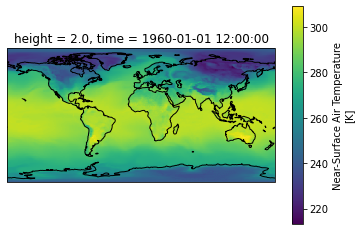

In [8]:
proj = ccrs.PlateCarree()
ax = plt.subplot(projection=proj)
ds_cam.isel(time=0).tas.plot(transform=proj, ax=ax)
ax.coastlines()

Text(0.5, 1.0, 'CAM5 minus HadGEM3 1960-01-01 12:00')

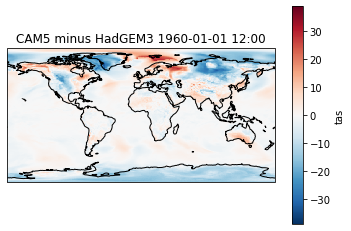

In [75]:
# interpolate CAM5 onto HadGEM3 grid
da_hadgem = ds_hadgem.isel(time=0).tas.drop('time')
da_cam = ds_cam.isel(time=0).tas.drop('time').interp(lat=da_hadgem.lat, lon=da_hadgem.lon, method='linear')

proj = ccrs.PlateCarree()
ax = plt.subplot(projection=proj)
(da_cam - da_hadgem).plot(transform=proj, ax=ax)
ax.coastlines()
plt.title('CAM5 minus HadGEM3 1960-01-01 12:00')

In [9]:
# To work with a full run
ds_hadgem_run1 = xr.open_mfdataset('/datastore/hadgem3/nat_hist/tas_Aday_HadGEM3-A-N216_Nat-Hist_CMIP5-est1_v1-0_r1i1p1_*.nc')

In [79]:
ds_hadgem_run1

<xarray.Dataset>
Dimensions:    (bnds: 2, height: 1, lat: 324, lon: 432, time: 19440)
Coordinates:
  * lon        (lon) float32 0.41666666 1.25 2.0833333 ... 358.75 359.5833
  * height     (height) float32 2.0
  * lat        (lat) float32 -89.72222 -89.166664 ... 89.16667 89.72223
  * time       (time) object 1960-01-01 12:00:00 ... 2013-12-30 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (time, lat, bnds) float32 dask.array<chunksize=(3600, 324, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float32 dask.array<chunksize=(3600, 432, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(3600, 2), meta=np.ndarray>
    tas        (time, height, lat, lon) float32 dask.array<chunksize=(3600, 1, 324, 432), meta=np.ndarray>
Attributes:
    history:                   2016-03-25T02:11:25Z: Naming and attribute con...
    source:                    MOHC Unified Model [N216L85]
    institution:               Met Office Hadley Centre, Fitzroy Road, Exeter...
    institute_id:              MOHC
    model_id:                  HadGEM3-A-N216
    forcing:                   GHG, Oz, LU, Sl, Vl, AA, (GHG = CO2, N2O, CH4,...
    parent_experiment_id:      N/A
    parent_experiment_rip:     N/A
    branch_time:               0.0
    contact:                   peter.stott@metoffice.gov.uk, andrew.ciavarell...
    initialization_method:     1
    physics_version:           1
    tracking_id:               b362115c-ed6c-4beb-ab8d-664c7e9d7519
    mo_runid:                  aorsa
    product:                   output
    experiment:                CMIP5-est1
    frequency:                 day
    creation_date:             2016-03-25T02:11:25Z
    project_id:                EUCLEIA, and C20C+ Detection and Attribution P...
    table_id:                  Table day (13 January 2015) 159846346d11cd9e5d...
    title:                     HadGEM3-A-N216 model output prepared for EUCLE...
    parent_experiment:         N/A
    modeling_realm:            atmos
    realization:               1
    cmor_version:              2.9.1
    experiment_family:         Nat-Hist
    parent_experiment_family:  N/A
    orig_experiment_id:        historicalNat
    subexperiment:             v1-0
    parent_subexperiment:      N/A
    orig_project_id:           EUCLEIA
    CDO:                       Climate Data Operators version 1.7.0 (http://m...
    run_id:                    r1i1p1
    acknowledgement:           This simulation was performed under funding fr...
    parent_run_id:             N/A
    license:                   I agree to restrict my use of EUCLEIA model ou...

In [78]:
ds_cam_run1 = xr.open_mfdataset('/datastore/cam5/tas_Aday_CAM5-1-1degree_Nat-Hist_CMIP5-est1_v2-0_run001_*.nc')

In [80]:
ds_cam_run1

,Array,Chunk
Bytes,659.87 kB,11.68 kB
Shape,"(20621, 2, 2)","(365, 2, 2)"
Count,285 Tasks,57 Chunks
Type,object,numpy.ndarray
,Array,Chunk
Bytes,4.56 GB,80.73 MB
Shape,"(20621, 1, 192, 288)","(365, 1, 192, 288)"
Count,171 Tasks,57 Chunks
Type,float32,numpy.ndarray


Of course. Why would they be on the same calendar. That would just be too easy.